In [10]:
import pandas as pd

df = pd.read_csv("prediction_attention.tsv", sep="\t")

# Fix: assign filtered result to a variable or just print it directly
matched = df[df["Target"] == df["Predicted"]]
print(matched)

# Optional: to check how many matched
print(f"\nExact matches: {len(matched)} / {len(df)} = {len(matched)/len(df):.2%}")


         Input    Target Predicted
0          ank       अंक       अंक
2        ankit     अंकित     अंकित
7        ankor     अंकोर     अंकोर
8     angaarak    अंगारक    अंगारक
9      angarak    अंगारक    अंगारक
...        ...       ...       ...
4482     hegde     हेगडे     हेगडे
4483   hemvati    हेमवती    हेमवती
4485      help     हेल्प     हेल्प
4486    helper    हेल्पर    हेल्पर
4497   holding  होल्डिंग  होल्डिंग

[1738 rows x 3 columns]

Exact matches: 1738 / 4502 = 38.61%


findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
findfont: Font family 'Noto Sans Tamil' not found.
C:\Users\sakth\AppData\Local\Temp\ipykernel_7180\2165935319.py:37: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sakth\AppData\Local\Temp\ipykernel_7180\2165935319.py:37: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
C:\Users\sakth\AppData\Local\Temp\ipykernel_7180\2165935319.py:37

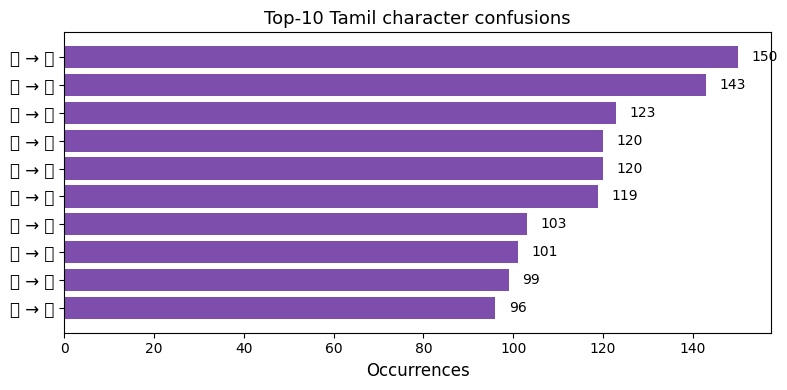

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams
from pathlib import Path


rcParams["font.family"] = "Noto Sans Tamil"

# 2 ─ load the TSV
df = pd.read_csv("predictions_vanilla/best_model_test_predictions.tsv",
                 sep="\t", header=None,
                 names=["roman","true","pred"])

# 3 ─ compute top-10 confusions (same code as before) …
pad="∅"
chars=sorted(set("".join(df.true)+ "".join(df.pred)+pad))
c2i={c:i for i,c in enumerate(chars)}
cm=np.zeros((len(chars),len(chars)),dtype=int)
for t,p in zip(df.true, df.pred):
    L=max(len(t),len(p))
    t+=pad*(L-len(t)); p+=pad*(L-len(p))
    for tc,pc in zip(t,p): cm[c2i[tc],c2i[pc]]+=1
conf=[(cm[c2i[a],c2i[b]],a,b) for a in chars for b in chars
      if a!=b and a!=pad and b!=pad]
top10=sorted(conf,reverse=True)[:10]

# 4 ─ plot
pairs=[f"{a} → {b}" for _,a,b in top10][::-1]
counts=[c for c,_,_ in top10][::-1]

plt.figure(figsize=(8,4))
plt.barh(range(10), counts, color="#7d4eac")
plt.yticks(range(10), pairs, fontsize=12)
plt.xlabel("Occurrences", fontsize=12)
plt.title("Top-10 Tamil character confusions", fontsize=13)
for i,val in enumerate(counts):
    plt.text(val+3, i, str(val), va='center')
plt.tight_layout()
plt.savefig("top10_confusions_tamil.png", dpi=300)
